In [1]:
%pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [3]:
conn = sqlite3.connect("data.sqlite")

In [4]:
tables = pd.read_sql_query("""SELECT *
                        FROM sqlite_master
                        WHERE type='table'
                     """, conn)

In [5]:
tables

,type,name,tbl_name,rootpage,sql
0,table,orders,orders,2,"CREATE TABLE `orders` (`orderNumber`, `orderDa..."
1,table,offices,offices,5,"CREATE TABLE `offices` (`officeCode`, `city`, ..."
2,table,productlines,productlines,6,"CREATE TABLE `productlines` (`productLine`, `t..."
3,table,orderdetails,orderdetails,7,"CREATE TABLE `orderdetails` (`orderNumber`, `p..."
4,table,customers,customers,8,"CREATE TABLE `customers` (`customerNumber`, `c..."
5,table,warehouses,warehouses,12,"CREATE TABLE `warehouses` (`warehouseCode`, `w..."
6,table,products,products,13,"CREATE TABLE `products` (`productCode`, `produ..."
7,table,payments,payments,22,"CREATE TABLE `payments` (`customerNumber`, `ch..."
8,table,employees,employees,23,"CREATE TABLE `employees` (`employeeNumber`, `l..."


In [6]:
query = """
SELECT * FROM products
"""

df_prod = pd.read_sql(query, conn)
df_prod

,productCode,productName,productLine,productScale,productVendor,productDescription,quantityInStock,warehouseCode,buyPrice,MSRP
0,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,a,48.81,95.70
1,S10_1949,1952 Alpine Renault 1300,Classic Cars,1:10,Classic Metal Creations,Turnable front wheels; steering function; deta...,7305,b,98.58,214.30
2,S10_2016,1996 Moto Guzzi 1100i,Motorcycles,1:10,Highway 66 Mini Classics,"Official Moto Guzzi logos and insignias, saddl...",6625,a,68.99,118.94
3,S10_4698,2003 Harley-Davidson Eagle Drag Bike,Motorcycles,1:10,Red Start Diecast,"Model features, official Harley Davidson logos...",5582,a,91.02,193.66
4,S10_4757,1972 Alfa Romeo GTA,Classic Cars,1:10,Motor City Art Classics,Features include: Turnable front wheels; steer...,3252,b,85.68,136.00
...,...,...,...,...,...,...,...,...,...,...
95,S50_4713,2002 Yamaha YZR M1,Motorcycles,1:50,Autoart Studio Design,"Features rotating wheels , working kick stand....",600,a,34.17,81.36
96,S700_1138,The Schooner Bluenose,Ships,1:700,Autoart Studio Design,All wood with canvas sails. Measures 31 1/2 in...,1897,d,34.00,66.67
97,S700_1691,American Airlines: B767-300,Planes,1:700,Min Lin Diecast,Exact replia with official logos and insignias...,5841,a,51.15,91.34
98,S700_1938,The Mayflower,Ships,1:700,Studio M Art Models,Measures 31 1/2 inches Long x 25 1/2 inches Hi...,737,d,43.30,86.61


In [7]:
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   productCode         100 non-null    object
 1   productName         100 non-null    object
 2   productLine         100 non-null    object
 3   productScale        100 non-null    object
 4   productVendor       100 non-null    object
 5   productDescription  100 non-null    object
 6   quantityInStock     100 non-null    object
 7   warehouseCode       100 non-null    object
 8   buyPrice            100 non-null    object
 9   MSRP                100 non-null    object
dtypes: object(10)
memory usage: 4.0+ KB


In [8]:
df_prod.shape

(100, 10)

In [9]:
df_prod['quantityInStock'] = df_prod['quantityInStock'].astype(int)
df_prod[['MSRP','buyPrice']] = df_prod[['MSRP','buyPrice']].astype('float')
df_prod.sort_values(['quantityInStock'], ascending=False, inplace=True)
df_prod['Net_Profit'] = df_prod['MSRP'] - df_prod['buyPrice']
df_prod

,productCode,productName,productLine,productScale,productVendor,productDescription,quantityInStock,warehouseCode,buyPrice,MSRP,Net_Profit
9,S12_2823,2002 Suzuki XREO,Motorcycles,1:12,Unimax Art Galleries,"Official logos and insignias, saddle bags loca...",9997,a,66.27,150.62,84.35
24,S18_1984,1995 Honda Civic,Classic Cars,1:18,Min Lin Diecast,"This model features, opening hood, opening doo...",9772,b,93.89,142.25,48.36
75,S24_3432,2002 Chevy Corvette,Classic Cars,1:24,Gearbox Collectibles,The operating parts of this limited edition Di...,9446,b,62.11,107.08,44.97
28,S18_2325,1932 Model A Ford J-Coupe,Vintage Cars,1:18,Autoart Studio Design,This model features grille-mounted chrome horn...,9354,c,58.48,127.13,68.65
86,S32_2206,1982 Ducati 996 R,Motorcycles,1:32,Gearbox Collectibles,"Features rotating wheels , working kick stand....",9241,a,24.14,40.23,16.09
...,...,...,...,...,...,...,...,...,...,...,...
26,S18_2248,1911 Ford Town Car,Vintage Cars,1:18,Motor City Art Classics,"Features opening hood, opening doors, opening ...",540,c,33.30,60.54,27.24
85,S32_1374,1997 BMW F650 ST,Motorcycles,1:32,Exoto Designs,Features official die-struck logos and baked e...,178,a,66.92,99.89,32.97
90,S32_4289,1928 Ford Phaeton Deluxe,Vintage Cars,1:32,Highway 66 Mini Classics,This model features grille-mounted chrome horn...,136,c,33.02,68.79,35.77
6,S12_1099,1968 Ford Mustang,Classic Cars,1:12,Autoart Studio Design,"Hood, doors and trunk all open to reveal highl...",68,b,95.34,194.57,99.23


In [10]:
sum = df_prod.groupby('warehouseCode')['quantityInStock'].sum()
sum

warehouseCode
a    100701
b    212249
c    124880
d     64839
Name: quantityInStock, dtype: int32

(array([0, 1, 2, 3]),
 [Text(0, 0, 'a'), Text(1, 0, 'b'), Text(2, 0, 'c'), Text(3, 0, 'd')])

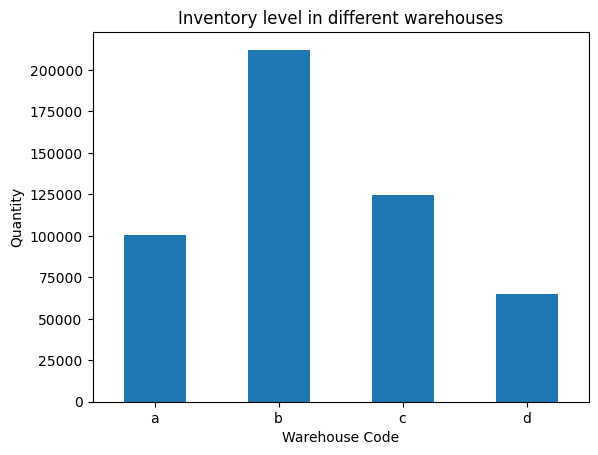

In [11]:
ax = sum.plot.bar()
ax.set_title('Inventory level in different warehouses') 
ax.set_xlabel('Warehouse Code')
ax.set_ylabel('Quantity')
plt.xticks(rotation=0)

In [12]:
query = """
SELECT * FROM warehouses
"""

df_warh = pd.read_sql(query, conn)
df_warh

,warehouseCode,warehouseName,warehousePctCap
0,a,North,72
1,b,East,67
2,c,West,50
3,d,South,75


In [13]:
df_sum = sum.reset_index()
df_sum

,warehouseCode,quantityInStock
0,a,100701
1,b,212249
2,c,124880
3,d,64839


In [14]:
df_warh['Used_Capacity'] = df_sum['quantityInStock']
df_warh

,warehouseCode,warehouseName,warehousePctCap,Used_Capacity
0,a,North,72,100701
1,b,East,67,212249
2,c,West,50,124880
3,d,South,75,64839


In [15]:
df_warh['warehousePctCap'] = df_warh['warehousePctCap'].astype(int)
df_warh['Total_Capacity'] = df_warh['Used_Capacity'] / ((100 - df_warh['warehousePctCap']) / 100)
df_warh

,warehouseCode,warehouseName,warehousePctCap,Used_Capacity,Total_Capacity
0,a,North,72,100701,359646.428571
1,b,East,67,212249,643178.787879
2,c,West,50,124880,249760.000000
3,d,South,75,64839,259356.000000


In [16]:
df_warh['Total_Capacity'] = df_warh['Total_Capacity'].astype(int)
df_warh

,warehouseCode,warehouseName,warehousePctCap,Used_Capacity,Total_Capacity
0,a,North,72,100701,359646
1,b,East,67,212249,643178
2,c,West,50,124880,249760
3,d,South,75,64839,259356


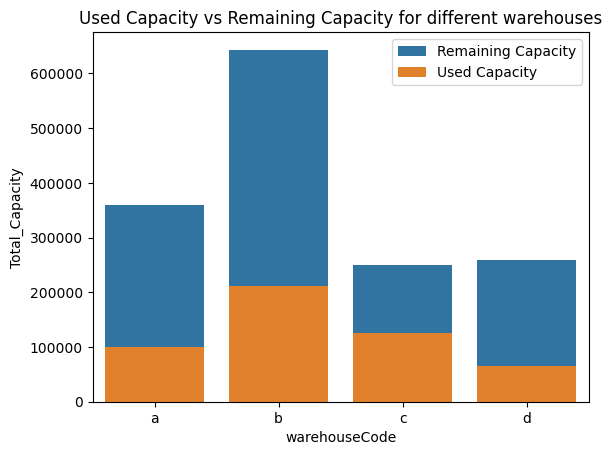

In [17]:
ax = plt.subplots()
 
# plotting columns
ax = sns.barplot(x=df_warh["warehouseCode"], y=df_warh["Total_Capacity"], label='Remaining Capacity')
ax = sns.barplot(x=df_warh["warehouseCode"], y=df_warh["Used_Capacity"], label='Used Capacity')
ax.set_title('Used Capacity vs Remaining Capacity for different warehouses')
ax.legend()

In [210]:
query = """
SELECT * FROM orders
"""

df_ord = pd.read_sql(query, conn)
df_ord

,orderNumber,orderDate,requiredDate,shippedDate,status,comments,customerNumber
0,10100,2003-01-06,2003-01-13,2003-01-10,Shipped,,363
1,10101,2003-01-09,2003-01-18,2003-01-11,Shipped,Check on availability.,128
2,10102,2003-01-10,2003-01-18,2003-01-14,Shipped,,181
3,10103,2003-01-29,2003-02-07,2003-02-02,Shipped,,121
4,10104,2003-01-31,2003-02-09,2003-02-01,Shipped,,141
...,...,...,...,...,...,...,...
95,10195,2003-11-25,2003-12-01,2003-11-28,Shipped,,319
96,10196,2003-11-26,2003-12-03,2003-12-01,Shipped,,455
97,10197,2003-11-26,2003-12-02,2003-12-01,Shipped,Customer inquired about remote controlled mode...,216
98,10198,2003-11-27,2003-12-06,2003-12-03,Shipped,,385


In [211]:
query = """
SELECT * FROM orderdetails
"""

df_odt = pd.read_sql(query, conn)
df_odt

,orderNumber,productCode,quantityOrdered,priceEach,orderLineNumber
0,10100,S18_1749,30,136.00,3
1,10100,S18_2248,50,55.09,2
2,10100,S18_4409,22,75.46,4
3,10100,S24_3969,49,35.29,1
4,10101,S18_2325,25,108.06,4
...,...,...,...,...,...
95,10108,S50_4713,34,74.85,14
96,10109,S18_1129,26,117.48,4
97,10109,S18_1984,38,137.98,3
98,10109,S18_2870,26,126.72,1


In [212]:
query = """
SELECT ORD.orderNumber, ORD.orderDate, ODT.orderNumber, ODT.productCode, ODT.quantityOrdered
FROM orders ORD RIGHT JOIN orderdetails ODT
ON ORD.orderNumber = ODT.orderNumber
"""

df_join = pd.read_sql(query, conn)
df_join

,orderNumber,orderDate,orderNumber,productCode,quantityOrdered
0,10100,2003-01-06,10100,S18_1749,30
1,10100,2003-01-06,10100,S18_2248,50
2,10100,2003-01-06,10100,S18_4409,22
3,10100,2003-01-06,10100,S24_3969,49
4,10101,2003-01-09,10101,S18_2325,25
...,...,...,...,...,...
95,10108,2003-03-03,10108,S50_4713,34
96,10109,2003-03-10,10109,S18_1129,26
97,10109,2003-03-10,10109,S18_1984,38
98,10109,2003-03-10,10109,S18_2870,26


In [213]:
df_join['orderDate'] = df_join['orderDate'].astype('datetime64[ns]')

In [214]:
df_join['quantityOrdered'] = df_join['quantityOrdered'].astype('int')
join_sum = df_join.groupby('orderDate')['quantityOrdered'].sum()
join_sum

orderDate
2003-01-06    151
2003-01-09    142
2003-01-10     80
2003-01-29    541
2003-01-31    443
2003-02-11    545
2003-02-17    675
2003-02-24    229
2003-03-03    561
2003-03-10    136
Name: quantityOrdered, dtype: int32

In [95]:
# join_sum = join_sum.reset_index()
join_sum

,orderDate,quantityOrdered
0,2003-01-06,151
1,2003-01-09,142
2,2003-01-10,80
3,2003-01-29,541
4,2003-01-31,443
5,2003-02-11,545
6,2003-02-17,675
7,2003-02-24,229
8,2003-03-03,561
9,2003-03-10,136


In [101]:
join_sum['Aggregate'] = 0
join_sum['Aggregate'].iloc[0] = 151

for n in join_sum.index.tolist():
    if n > 0:
        join_sum['Aggregate'].iloc[n] = join_sum['quantityOrdered'].iloc[n] + join_sum['Aggregate'].iloc[n-1]

<ipython-input-101-39c2b0b3a0e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  join_sum['Aggregate'].iloc[n] = join_sum['quantityOrdered'].iloc[n] + join_sum['Aggregate'].iloc[n-1]


In [102]:
join_sum

,orderDate,quantityOrdered,Aggregate
0,2003-01-06,151,151
1,2003-01-09,142,293
2,2003-01-10,80,373
3,2003-01-29,541,914
4,2003-01-31,443,1357
5,2003-02-11,545,1902
6,2003-02-17,675,2577
7,2003-02-24,229,2806
8,2003-03-03,561,3367
9,2003-03-10,136,3503


Text(0.5, 0, 'Order Date')

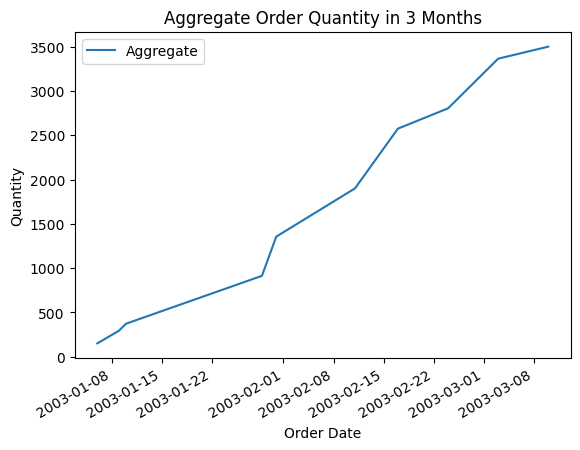

In [104]:
join_sum.plot.line(x='orderDate', y='Aggregate')
plt.title('Aggregate Order Quantity in 3 Months')
plt.ylabel('Quantity')
plt.xlabel('Order Date')

In [285]:
query = """
SELECT ODT.productCode, ODT.quantityOrdered, PROD.productCode as productCode1, PROD.productName, PROD.quantityInStock, PROD.buyPrice, PROD.MSRP
FROM orderdetails ODT LEFT JOIN products PROD
ON ODT.productCode = PROD.productCode
"""

df_join1 = pd.read_sql(query, conn)
df_join1

,productCode,quantityOrdered,productCode1,productName,quantityInStock,buyPrice,MSRP
0,S18_1749,30,S18_1749,1917 Grand Touring Sedan,2724,86.70,170.00
1,S18_2248,50,S18_2248,1911 Ford Town Car,540,33.30,60.54
2,S18_4409,22,S18_4409,1932 Alfa Romeo 8C2300 Spider Sport,6553,43.26,92.03
3,S24_3969,49,S24_3969,1936 Mercedes Benz 500k Roadster,2081,21.75,41.03
4,S18_2325,25,S18_2325,1932 Model A Ford J-Coupe,9354,58.48,127.13
...,...,...,...,...,...,...,...
95,S50_4713,34,S50_4713,2002 Yamaha YZR M1,600,34.17,81.36
96,S18_1129,26,S18_1129,1993 Mazda RX-7,3975,83.51,141.54
97,S18_1984,38,S18_1984,1995 Honda Civic,9772,93.89,142.25
98,S18_2870,26,S18_2870,1999 Indy 500 Monte Carlo SS,8164,56.76,132.00


In [286]:
df_join1.drop(df_join1[df_join1['productCode'] != df_join1['productCode1']].index, inplace=True)

In [289]:
df_join1[['quantityInStock','quantityOrdered']] = df_join1[['quantityInStock','quantityOrdered']].astype(int)
df_join1[['MSRP','buyPrice']] = df_join1[['MSRP','buyPrice']].astype('float')
df_join1['Net_Profit'] = (df_join1['MSRP'] - df_join1['buyPrice']) * df_join1['quantityOrdered']
df_join1

,productCode,quantityOrdered,productCode1,productName,quantityInStock,buyPrice,MSRP,Net_Profit
0,S18_1749,30,S18_1749,1917 Grand Touring Sedan,2724,86.70,170.00,2499.00
1,S18_2248,50,S18_2248,1911 Ford Town Car,540,33.30,60.54,1362.00
2,S18_4409,22,S18_4409,1932 Alfa Romeo 8C2300 Spider Sport,6553,43.26,92.03,1072.94
3,S24_3969,49,S24_3969,1936 Mercedes Benz 500k Roadster,2081,21.75,41.03,944.72
4,S18_2325,25,S18_2325,1932 Model A Ford J-Coupe,9354,58.48,127.13,1716.25
...,...,...,...,...,...,...,...,...
95,S50_4713,34,S50_4713,2002 Yamaha YZR M1,600,34.17,81.36,1604.46
96,S18_1129,26,S18_1129,1993 Mazda RX-7,3975,83.51,141.54,1508.78
97,S18_1984,38,S18_1984,1995 Honda Civic,9772,93.89,142.25,1837.68
98,S18_2870,26,S18_2870,1999 Indy 500 Monte Carlo SS,8164,56.76,132.00,1956.24


In [346]:
df_join1.sort_values('Net_Profit',ascending=False,inplace=True)
top5s = df_join1[['productName','Net_Profit']].head()
top5s.set_index('productName',inplace=True)
top5s

,Net_Profit
productName,
2001 Ferrari Enzo,4600.61
1992 Ferrari 360 Spider red,4206.24
1957 Corvette Convertible,3470.28
1968 Ford Mustang,3274.59
1952 Alpine Renault 1300,3008.72


Text(0, 0.5, 'Net Profit (USD)')

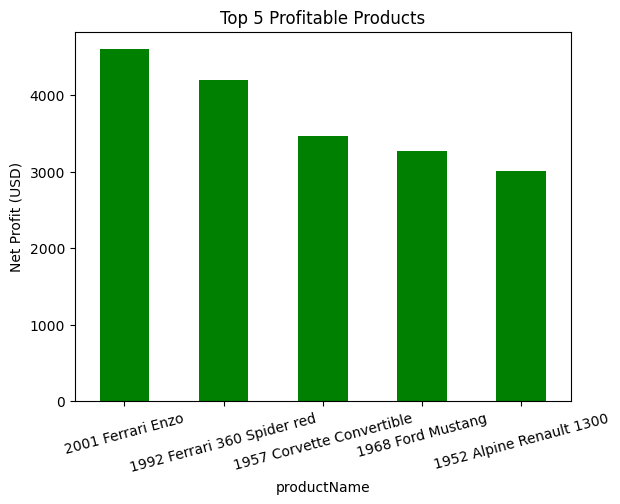

In [347]:
top5s.plot.bar(rot=15,color=['green','yellow'],legend=False)
plt.title('Top 5 Profitable Products')
plt.ylabel('Net Profit (USD)')

In [340]:
df_join1['Ratio (%)'] = df_join1['quantityOrdered'] / df_join1['quantityInStock']
df_join1['Ratio (%)'] = df_join1['Ratio (%)']*100
df_join1

,productCode,quantityOrdered,productCode1,productName,quantityInStock,buyPrice,MSRP,Net_Profit,Ratio (%)
40,S12_1108,41,S12_1108,2001 Ferrari Enzo,3619,95.59,207.80,4600.61,1.132910
99,S18_3232,46,S18_3232,1992 Ferrari 360 Spider red,8347,77.90,169.34,4206.24,0.551096
88,S18_4721,44,S18_4721,1957 Corvette Convertible,1249,69.93,148.80,3470.28,3.522818
80,S12_1099,33,S12_1099,1968 Ford Mustang,68,95.34,194.57,3274.59,48.529412
10,S10_1949,26,S10_1949,1952 Alpine Renault 1300,7305,98.58,214.30,3008.72,0.355921
...,...,...,...,...,...,...,...,...,...
38,S50_1514,32,S50_1514,1962 City of Detroit Streetcar,1645,37.49,58.58,674.88,1.945289
79,S32_1374,20,S32_1374,1997 BMW F650 ST,178,66.92,99.89,659.40,11.235955
64,S50_1341,39,S50_1341,1930 Buick Marquette Phaeton,7062,27.06,43.64,646.62,0.552251
6,S24_1937,45,S24_1937,1939 Chevrolet Deluxe Coupe,7332,22.57,33.19,477.90,0.613748


In [341]:
df_join1.sort_values('Ratio (%)', ascending=False, inplace=True)
df_join1

,productCode,quantityOrdered,productCode1,productName,quantityInStock,buyPrice,MSRP,Net_Profit,Ratio (%)
78,S24_2000,38,S24_2000,1960 BSA Gold Star DBD34,15,37.32,76.17,1476.30,253.333333
80,S12_1099,33,S12_1099,1968 Ford Mustang,68,95.34,194.57,3274.59,48.529412
63,S32_4289,33,S32_4289,1928 Ford Phaeton Deluxe,136,33.02,68.79,1180.41,24.264706
79,S32_1374,20,S32_1374,1997 BMW F650 ST,178,66.92,99.89,659.40,11.235955
1,S18_2248,50,S18_2248,1911 Ford Town Car,540,33.30,60.54,1362.00,9.259259
...,...,...,...,...,...,...,...,...,...
86,S18_3482,29,S18_3482,1976 Ford Gran Torino,9127,73.49,146.99,2131.50,0.317739
93,S32_2206,27,S32_2206,1982 Ducati 996 R,9241,24.14,40.23,434.43,0.292176
30,S18_3232,23,S18_3232,1992 Ferrari 360 Spider red,8347,77.90,169.34,2103.12,0.275548
4,S18_2325,25,S18_2325,1932 Model A Ford J-Coupe,9354,58.48,127.13,1716.25,0.267265


In [342]:
top5 = df_join1[['productName','quantityOrdered','quantityInStock']].head()
top5.set_index('productName',inplace=True)
top5

,quantityOrdered,quantityInStock
productName,,
1960 BSA Gold Star DBD34,38,15
1968 Ford Mustang,33,68
1928 Ford Phaeton Deluxe,33,136
1997 BMW F650 ST,20,178
1911 Ford Town Car,50,540


(0.0, 600.0)

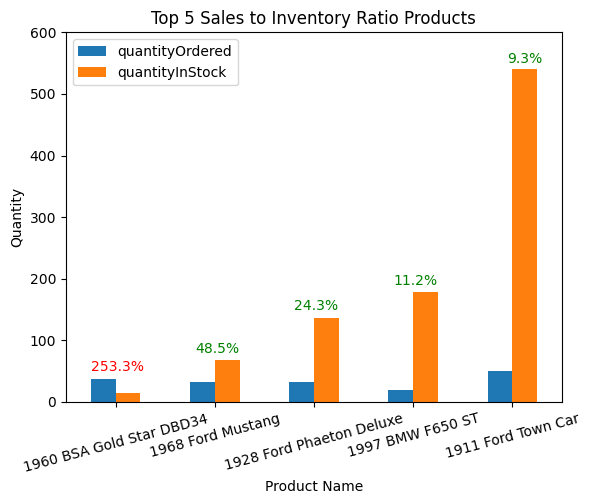

In [350]:
top5.plot.bar(rot=15,legend=['Quantity Ordered','Quantity In Stock'])
plt.title('Top 5 Sales to Inventory Ratio Products')
plt.xlabel('Product Name')
plt.ylabel('Quantity')
plt.text(-0.25,50,'253.3%',color='r')
plt.text(0.8,80,'48.5%',color='g')
plt.text(1.8,150,'24.3%',color='g')
plt.text(2.8,190,'11.2%',color='g')
plt.text(3.95,550,'9.3%',color='g')
plt.ylim(0,600)

In [23]:
query = """
SELECT ODT.productCode, ODT.quantityOrdered, PROD.productCode as productCode1, PROD.productName, PROD.quantityInStock, PROD.warehouseCode, PROD.productLine
FROM orderdetails ODT RIGHT JOIN products PROD
ON ODT.productCode = PROD.productCode
"""

df_join2 = pd.read_sql(query, conn)
df_join2

,productCode,quantityOrdered,productCode1,productName,quantityInStock,warehouseCode,productLine
0,S18_1749,30,S18_1749,1917 Grand Touring Sedan,2724,c,Vintage Cars
1,S18_2248,50,S18_2248,1911 Ford Town Car,540,c,Vintage Cars
2,S18_4409,22,S18_4409,1932 Alfa Romeo 8C2300 Spider Sport,6553,c,Vintage Cars
3,S24_3969,49,S24_3969,1936 Mercedes Benz 500k Roadster,2081,c,Vintage Cars
4,S18_2325,25,S18_2325,1932 Model A Ford J-Coupe,9354,c,Vintage Cars
...,...,...,...,...,...,...,...
96,None,None,S24_2766,1949 Jaguar XK 120,2350,b,Classic Cars
97,None,None,S24_2887,1952 Citroen-15CV,1452,b,Classic Cars
98,None,None,S24_2972,1982 Lamborghini Diablo,7723,b,Classic Cars
99,None,None,S24_3191,1969 Chevrolet Camaro Z28,4695,b,Classic Cars


In [24]:
df_join2.drop(df_join2[df_join2['productCode'] == df_join2['productCode1']].index, inplace=True)
df_join2.sort_values('quantityInStock', ascending=True, inplace=True)
df_join2['quantityInStock'] = df_join2['quantityInStock'].astype('int')
df_join2

,productCode,quantityOrdered,productCode1,productName,quantityInStock,warehouseCode,productLine
94,None,None,S24_1046,1970 Chevy Chevelle SS 454,1005,b,Classic Cars
97,None,None,S24_2887,1952 Citroen-15CV,1452,b,Classic Cars
96,None,None,S24_2766,1949 Jaguar XK 120,2350,b,Classic Cars
93,None,None,S18_4933,1957 Ford Thunderbird,3209,b,Classic Cars
99,None,None,S24_3191,1969 Chevrolet Camaro Z28,4695,b,Classic Cars
98,None,None,S24_2972,1982 Lamborghini Diablo,7723,b,Classic Cars
91,None,None,S18_3233,1985 Toyota Supra,7733,b,Classic Cars
95,None,None,S24_1628,1966 Shelby Cobra 427 S/C,8197,b,Classic Cars
92,None,None,S18_3685,1948 Porsche Type 356 Roadster,8990,b,Classic Cars
90,None,None,S18_1589,1965 Aston Martin DB5,9042,b,Classic Cars


Text(0, 0.5, 'Product Code')

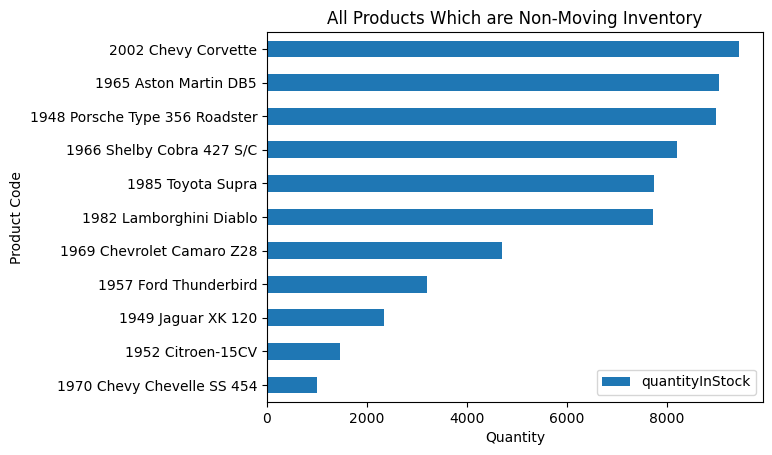

In [25]:
df_join2.plot.barh(x='productName', y='quantityInStock')
plt.title('All Products Which are Non-Moving Inventory')
plt.xlabel('Quantity')
plt.ylabel('Product Code')

In [26]:
df_warh[['Used_Capacity','Total_Capacity']] = df_warh[['Used_Capacity','Total_Capacity']].astype('int')
cap_b = df_warh['Used_Capacity'].iloc[1]
rcap_b = df_warh['Total_Capacity'].iloc[1] - cap_b
nmcap_b = df_join2['quantityInStock'].sum()
mcap_b = cap_b - nmcap_b
print(mcap_b,rcap_b,nmcap_b)

148407 430929 63842


In [27]:
df_nmicap = pd.DataFrame({'Capacity':[mcap_b,rcap_b,nmcap_b]},
                        index=['Moving Capacity','Remaing Capacity','Non-Moving Capacity'])

In [28]:
df_nmicap

,Capacity
Moving Capacity,148407
Remaing Capacity,430929
Non-Moving Capacity,63842


Text(0.5, 1.0, 'Total Capacity Occupation in Warehouse B')

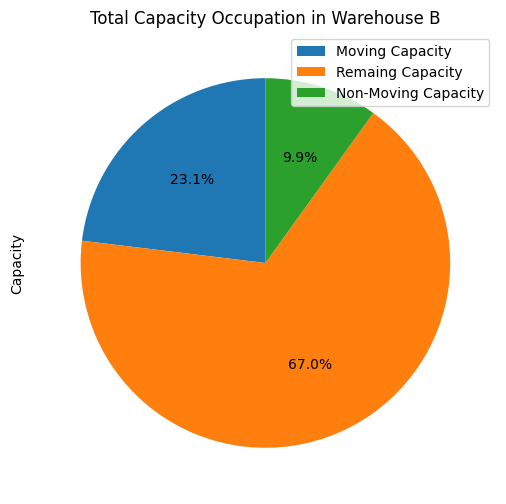

In [29]:
df_nmicap.plot.pie(y='Capacity',
                   figsize=(10,6),
                   autopct='%1.1f%%',
                   startangle=90,
                   labels=None
                  )
plt.title('Total Capacity Occupation in Warehouse B')